**폰트 설정**

In [2]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

!apt-get -qq -y install fonts-nanum > /dev/null
fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
    name='NanumGothic')
fm.fontManager.ttflist.insert(0, fe)
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'})

In [ ]:
# 런타임 재시작
import os
os.kill(os.getpid(), 9)

In [3]:
import matplotlib as mpl
import matplotlib.font_manager as fm

# 마이너스 표시 문제
mpl.rcParams['axes.unicode_minus'] = False

# 한글 폰트 설정
fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
    name='NanumGothic')
fm.fontManager.ttflist.insert(0, fe)
plt.rcParams.update({'font.size': 15, 'font.family': 'NanumGothic'})

셀레니움 설치

In [4]:
import sys

!sudo add-apt-repository ppa:saiarcot895/chromium-beta #실행 결과에서 Enter 입력
!sudo apt remove chromium-browser
!sudo snap remove chromium
!sudo apt install chromium-browser

!pip3 install selenium
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')

PPA publishes dbgsym, you may need to include 'main/debug' component
Repository: 'deb https://ppa.launchpadcontent.net/saiarcot895/chromium-beta/ubuntu/ jammy main'
Description:
This PPA contains the latest Chromium Beta builds, with hardware video decoding enabled (hidden behind a flag), and support for Widevine (needed for viewing many DRM-protected videos) enabled.

== Hardware Video Decoding ==

To enable hardware video decoding, start Chromium with the --enable-features=VaapiVideoDecoder argument. To make this persistent, create a file at /etc/chromium-browser/customizations/92-vaapi-hardware-decoding with the following contents:

CHROMIUM_FLAGS="${CHROMIUM_FLAGS} --enable-features=VaapiVideoDecoder"

See also https://wiki.archlinux.org/title/Chromium#Hardware_video_acceleration for more information on VAAPI video decoding support.

=== Widevine Support ===

The packages in this PPA have support for Widevine inside Chromium enabled. However, you still need to copy some files from 

# **인기 대출 도서 목록과 사서 추천 도서 목록 가져오기**

1.  인기 대출 도서 파일 읽어오기



In [5]:
import pandas as pd

book_data = pd.read_csv('/content/20231127_100Book.csv', engine='python', encoding='CP949')
book_data

,제어번호,제목,저자,발행처,발행년도,ISBN번호,분류기호,대출횟수
0,541851,소년이 온다 :한강 장편소설,한강 지음,창비,2014,9788936434120,8,23
1,1297078,여행의 이유 :김영하 산문,김영하 지음,문학동네,2019,9788954655972,8,23
2,270510,나미야 잡화점의 기적 :히가시노 게이고 장편소설,히가시노 게이고 지음,현대문학,2012,9788972756194,8,22
3,1481845,미드나잇 라이브러리,매트 헤이그 지음,인플루엔셜,2021,9791191056556,8,20
4,1508624,지구 끝의 온실 :김초엽 장편소설,김초엽 지음,Giant Books(자이언트북스),2021,9791191824001,8,18
...,...,...,...,...,...,...,...,...
2995,510775,경세황비 : 오정옥 장편소설 .1,오정옥 지음,새파란상상,2014,9788963711423,8,2
2996,1561910,"계속 가보겠습니다 :내부 고발 검사, 10년의 기록과 다짐",임은정 지음,메디치: 메디치미디어,2022,9791157062645,3,2
2997,87080,고고70 [DVD녹화자료],최호 감독,케이디미디어,2009,NaN,6,2
2998,88485,고공침투 [DVD녹화자료] =Drop Zone,존 바담 감독,새롬엔터테인먼트 [판매],2001,NaN,6,2


2.  결측치 제거: 'ISBN번호' 컬럼에 결측치가 있는 행 제거



In [15]:
book_data.dropna(subset=['ISBN번호'], how='any', axis=0, inplace=True)
book_data

,제어번호,제목,저자,발행처,발행년도,ISBN번호,분류기호,대출횟수
0,541851,소년이 온다 :한강 장편소설,한강 지음,창비,2014,9788936434120,8,23
1,1297078,여행의 이유 :김영하 산문,김영하 지음,문학동네,2019,9788954655972,8,23
2,270510,나미야 잡화점의 기적 :히가시노 게이고 장편소설,히가시노 게이고 지음,현대문학,2012,9788972756194,8,22
3,1481845,미드나잇 라이브러리,매트 헤이그 지음,인플루엔셜,2021,9791191056556,8,20
4,1508624,지구 끝의 온실 :김초엽 장편소설,김초엽 지음,Giant Books(자이언트북스),2021,9791191824001,8,18
...,...,...,...,...,...,...,...,...
2993,776786,"경매야, 우리 친구하자 :기초에서 실무까지",김종성 지음,한국경제신문i,2015,9788947540179,3,2
2994,947408,경성의 건축가들 :식민지 경성을 누빈 'B급' 건축가들의 삶과 유산,김소연 지음,루아크,2017,9791195713981,6,2
2995,510775,경세황비 : 오정옥 장편소설 .1,오정옥 지음,새파란상상,2014,9788963711423,8,2
2996,1561910,"계속 가보겠습니다 :내부 고발 검사, 10년의 기록과 다짐",임은정 지음,메디치: 메디치미디어,2022,9791157062645,3,2


3. 사서 추천 도서 목록 가져오기
(100개의 도서가 60일 누적이므로 2달간의 추천 목록을 가져온다.)

In [21]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import client_id

url = 'http://nl.go.kr/NL/search/openApi/saseoApi.do'

params = {
            "key" : client_id.key,
            "startRowNumApi" : '1',
            "endRowNumApi" : '10',
            "start_date" : '20230901',
            "end_date": '20231031'
          }
response = requests.get(url, params=params)
results = BeautifulSoup(response.content, 'xml')

list = []
dict = {}
for result in results.findAll('item'):
  if any(char.isspace() for char in result.recomisbn.text):
    isbn = result.recomisbn.text.split()
    dict['제목'] = result.recomtitle.text
    dict['작가'] = result.recomauthor.text
    dict['ISBN'] = isbn[1]
    list.append(dict)
  else:
    dict['제목'] = result.recomtitle.text
    dict['작가'] = result.recomauthor.text
    dict['ISBN'] = result.recomisbn.text
    list.append(dict)
  dict = {}

librarian_recommended_books = pd.DataFrame(list)
# 공백이 있는 행은 NaN으로 변경
librarian_recommended_books.replace('', pd.NA, inplace=True)
# ISBN 컬럼 결측치 제거
librarian_recommended_books.dropna(subset=['ISBN'], how='any', axis=0, inplace=True)
librarian_recommended_books


,제목,작가,ISBN
0,우리는 미래를 가져다 쓰고 있다 : 가장 낙관적인 미래를 위해 지금 우리가 해야 할 것,지은이: 윌리엄 맥어스킬 ;옮긴이: 이영래,9788934965947
1,"뜻밖의 것의 단순한 아름다움 : 어느 물리학자의 낚시, 생명, 우주에 관한 명상록",마르셀로 글레이서 지음 ;노태복 옮김,9788989007999
2,엣지 : 한 끗의 차이를 만드는 내 안의 힘,로라 후앙 지음 ;이윤진 옮김,9788933871942
3,지도로 보는 인류의 흑역사 : 세상에서 가장 불가사의하고 매혹적인 폐허 40,트래비스 엘버러 지음 ; 성소희 옮김,9791160405170
4,사계절 기억책 : 자연의 다정한 목격자 최원형의 사라지는 사계에 대한 기록,최원형 글·그림,9788968334320
5,인생 박물관 : 김동식 소설,지은이: 김동식,9791190749527
6,기계 살림 : 사이보그로 살아남는 법,전범선 지음,9791198286000


4. 사서 추천 도서를 도서관 이용자들이 읽었는지 조사하기

In [22]:
merge_df = pd.merge(book_data, librarian_recommended_books, how = 'inner', left_on='ISBN번호', right_on='ISBN')
merge_df =  merge_df.drop('ISBN', axis=1)
merge_df = merge_df.drop('제목_y', axis=1)
merge_df = merge_df.drop('작가', axis=1)
merge_df = merge_df.rename(columns={'제목_x':'제목'})
merge_df

,제어번호,제목,저자,발행처,발행년도,ISBN번호,분류기호,대출횟수
0,1592026,엣지 :한 끗의 차이를 만드는 내 안의 힘,로라 후앙 지음,세계사,2023,9788933871942,3,5
1,1627835,"뜻밖의 것의 단순한 아름다움 :어느 물리학자의 낚시, 생명, 우주에 관한 명상록",마르셀로 글레이서 지음,知와 사랑,2023,9788989007999,4,3
2,1628774,사계절 기억책 :자연의 다정한 목격자 최원형의 사라지는 사계에 대한 기록,최원형 글?그림,블랙피쉬: 백도씨,2023,9788968334320,4,3
3,1627823,우리는 미래를 가져다 쓰고 있다 :가장 낙관적인 미래를 위해 지금 우리가 해야 할 것,윌리엄 맥어스킬 지음,김영사,2023,9788934965947,1,3


5. 사서 추천 도서의 대출 횟수 시각화하기

In [23]:
import plotly.express as px

recommand_book_fig = px.bar(merge_df, x='제목', y='대출횟수', color='제목', color_continuous_scale=px.colors.diverging.PiYG,
              text_auto=True, title='사서 추천 도서의 대출 횟수')
recommand_book_fig.show()

6. 2000개가 넘는 책 데이터를 Top100, 100개로 조정하기

In [24]:

top100_book_data = []
while True:
    index = book_data['대출횟수'].idxmax()
    top100_book_data.append(book_data.iloc[index])


    if len(top100_book_data) == 100:
        top100_book_data = pd.DataFrame(top100_book_data, columns=['제어번호', '제목', '저자', '발행처', '발행년도', 'ISBN번호', '분류기호', '대출횟수'])
        top100_book_data.reset_index(drop=True, inplace=True)
        break

    book_data.drop(index, inplace=True)

top100_book_data

,제어번호,제목,저자,발행처,발행년도,ISBN번호,분류기호,대출횟수
0,541851,소년이 온다 :한강 장편소설,한강 지음,창비,2014,9788936434120,8,23
1,270510,나미야 잡화점의 기적 :히가시노 게이고 장편소설,히가시노 게이고 지음,현대문학,2012,9788972756194,8,22
2,1508624,지구 끝의 온실 :김초엽 장편소설,김초엽 지음,Giant Books(자이언트북스),2021,9791191824001,8,18
3,1550988,내가 틀릴 수도 있습니다 :숲속의 현자가 전하는 마지막 인생수업,비욘 나티코 린데블라드 지음,다산초당 : 다산북스,2022,9791130689890,2,15
4,1563918,하얼빈 :김훈 장편소설,김훈 지음,문학동네,2022,9788954699914,8,15
...,...,...,...,...,...,...,...,...
95,1473798,스노볼 드라이브 :조예은 장편소설,조예은 지음,민음사,2021,9788937473319,8,6
96,1397306,심판,베르나르 베르베르 지음,열린책들,2020,9788932920405,8,6
97,1635377,엄마가 죽어서 참 다행이야,제넷 맥커디 지음,위즈덤하우스,2023,9791168127562,8,6
98,1314602,역사의 쓸모 :자유롭고 떳떳한 삶을 위한 22가지 통찰,최태성 지음,다산초당: 다산북스,2019,9791130621968,9,6


#**Top 100 책 데이터에 카테고리, 설명 칼럼 추가하기**
#**사서 추천 도서 데이터에 카테고리 칼럼 추가하기**

1. 네이버 책 API 호출하여 도서의 설명, 링크 가져오기
2. 가져온 링크로 책의 카테고리 가져오기



In [25]:
import json
import os
import sys
import urllib.request
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By

id=client_id.id
secret = client_id.secret

service = Service(executable_path=r'/usr/bin/chromedriver')
options = webdriver.ChromeOptions()
options.add_argument('--headless') #창이 나타나지 않도록 Headless 설정하기
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome(service=service, options=options)

description = []
category = []

for i in range(0, len(top100_book_data)):

  book_isbn = urllib.parse.quote(top100_book_data.iloc[i][5])
  url = 'https://openapi.naver.com/v1/search/book_adv.json?d_isbn=' + book_isbn
  request = urllib.request.Request(url)
  request.add_header("X-Naver-Client-Id", id)
  request.add_header("X-Naver-Client-Secret", secret)
  response = urllib.request.urlopen(request)
  response_code = response.getcode()

  print(i, ':', book_isbn)

  if response_code == 200:
    response_body = response.read().decode('utf-8')
    result = json.loads(response_body)['items']

    if not result or len(result) == 0:
      print("?")
      result_description = '?'
      result_category = '?'
    else:
      print(result)
      result_description = result[0]['description']
      book_link = result[0]['link']
      driver.get(book_link)
      result_category = driver.find_element(By.XPATH,'//*[@id="book_section-info"]/div[2]/ul/li[1]/div/div[2]').text

    description.append(result_description)
    category.append(result_category)


  else:
    print("Error Code: ", reponse_code)


top100_book_data['설명'] = description
top100_book_data['카테고리'] = category
top100_book_data.to_csv('/content/top100_information.csv')
top100_book_data

0 : 9788936434120
[{'title': '소년이 온다 (한강 장편소설)', 'link': 'https://search.shopping.naver.com/book/catalog/32491401626', 'image': 'https://shopping-phinf.pstatic.net/main_3249140/32491401626.20231004072435.jpg', 'author': '한강', 'discount': '13500', 'publisher': '창비', 'pubdate': '20140519', 'isbn': '9788936434120', 'description': '고통스럽게 되살려낸 5월 광주\n\n한국인 최초 맨부커상 수상작가 한강의 여섯 번째 장편소설 『소년이 온다』. 1980년 5월 18일부터 열흘간 있었던 광주민주화운동 당시의 상황과 그 이후 남겨진 사람들의 이야기를 들려주는 소설이다. 2013년 11월부터 2014년 1월까지 창비문학블로그 ‘창문’에서 연재했던 작품으로 지금까지의 작품세계를 한 단계 끌어올렸다는 평가를 받았다. 철저한 고증과 취재를 통해 저자 특유의 정교하고도 밀도 있는 문장으로 계엄군에 맞서 싸우다 죽음을 맞게 된 중학생 동호와 주변 인물들의 고통 받는 내면을 생생하게 그려냈다.\n\n중학교 3학년이던 소년 동호는 친구 정대의 죽음을 목격한 이후 도청 상무관에서 시신들을 관리하는 일을 돕게 된다. 매일같이 합동분향소가 있는 상무관으로 들어오는 시신들을 수습하며 주검들의 말 없는 혼을 위로하기 위해 초를 밝히던 그는 시신들 사이에서 친구 정대의 처참한 죽음을 떠올리며 괴로워한다. \n\n그리고 그날, 돌아오라는 엄마와 돌아가라는 형, 누나들의 말을 듣지 않고 동호는 도청에 남는다. 동호와 함께 상무관에서 일하던 형과 누나들은 5·18 이후 경찰에 연행되어 끔찍한 고문을 받으며 살아 있다는 것을 치욕스러운 고통으로 여기거나 일상을 회복할 수 없는 무력감에 빠진다. 저자는 5·18 당시 숨죽이며 고통 받았던 인물들의 숨

,제어번호,제목,저자,발행처,발행년도,ISBN번호,분류기호,대출횟수,설명,카테고리
0,541851,소년이 온다 :한강 장편소설,한강 지음,창비,2014,9788936434120,8,23,고통스럽게 되살려낸 5월 광주\n\n한국인 최초 맨부커상 수상작가 한강의 여섯 번째...,한국소설
1,270510,나미야 잡화점의 기적 :히가시노 게이고 장편소설,히가시노 게이고 지음,현대문학,2012,9788972756194,8,22,히가시노 게이고의 차기 대표작으로 손꼽힐 『나미야 잡화점의 기적』\n\n추리적인 향...,일본소설
2,1508624,지구 끝의 온실 :김초엽 장편소설,김초엽 지음,Giant Books(자이언트북스),2021,9791191824001,8,18,"김초엽 첫 장편소설, 모두가 간절히 기다려온 이야기\n\n이미 폭넓은 독자층을 형성...",한국소설
3,1550988,내가 틀릴 수도 있습니다 :숲속의 현자가 전하는 마지막 인생수업,비욘 나티코 린데블라드 지음,다산초당 : 다산북스,2022,9791130689890,2,15,"때 이른 성공을 버리고 떠난 17년간의 숲속 수행, \n그리고 삶과 죽음의 경계에서...",교양인문
4,1563918,하얼빈 :김훈 장편소설,김훈 지음,문학동네,2022,9788954699914,8,15,『칼의 노래』를 넘어서는 깊이와 감동\n김훈이 반드시 써내야만 했던 일생의 과업\n...,전쟁/역사
...,...,...,...,...,...,...,...,...,...,...
95,1473798,스노볼 드라이브 :조예은 장편소설,조예은 지음,민음사,2021,9788937473319,8,6,세상이 망하기만을 바라던 어느 여름날\n녹지 않는 눈이 내리기 시작했다\n자라지 못...,SF/판타지
96,1397306,심판,베르나르 베르베르 지음,열린책들,2020,9788932920405,8,6,죽고 난 다음에 시작되는 특별한 심판\n\n『심판』은 저자 베르나르 베르베르가 《인...,프랑스소설
97,1635377,엄마가 죽어서 참 다행이야,제넷 맥커디 지음,위즈덤하우스,2023,9791168127562,8,6,"아마존, 뉴욕타임스 최장기 베스트셀러(54주째)\n독자 리뷰 6만 건, 판매 부수 ...",외국 에세이
98,1314602,역사의 쓸모 :자유롭고 떳떳한 삶을 위한 22가지 통찰,최태성 지음,다산초당: 다산북스,2019,9791130621968,9,6,길을 잃고 방황할 때마다 나는 역사에서 답을 찾았다!\n\n수백 년 전 이야기로 오...,교양인문


# **100개의 도서 카테고리 별 대출 횟수 시각화**



1.   100개의 도서를 카테고리 별로 분류하기



In [26]:
# 카테고리와 설명 컬럼 결측치 제거
top100_book_data.replace('?', pd.NA, inplace=True)
top100_book_data.dropna(subset=['카테고리'], how='any', axis=0, inplace=True)
top100_book_data.dropna(subset=['설명'], how='any', axis=0, inplace=True)
top100_book_data

,제어번호,제목,저자,발행처,발행년도,ISBN번호,분류기호,대출횟수,설명,카테고리
0,541851,소년이 온다 :한강 장편소설,한강 지음,창비,2014,9788936434120,8,23,고통스럽게 되살려낸 5월 광주\n\n한국인 최초 맨부커상 수상작가 한강의 여섯 번째...,한국소설
1,270510,나미야 잡화점의 기적 :히가시노 게이고 장편소설,히가시노 게이고 지음,현대문학,2012,9788972756194,8,22,히가시노 게이고의 차기 대표작으로 손꼽힐 『나미야 잡화점의 기적』\n\n추리적인 향...,일본소설
2,1508624,지구 끝의 온실 :김초엽 장편소설,김초엽 지음,Giant Books(자이언트북스),2021,9791191824001,8,18,"김초엽 첫 장편소설, 모두가 간절히 기다려온 이야기\n\n이미 폭넓은 독자층을 형성...",한국소설
3,1550988,내가 틀릴 수도 있습니다 :숲속의 현자가 전하는 마지막 인생수업,비욘 나티코 린데블라드 지음,다산초당 : 다산북스,2022,9791130689890,2,15,"때 이른 성공을 버리고 떠난 17년간의 숲속 수행, \n그리고 삶과 죽음의 경계에서...",교양인문
4,1563918,하얼빈 :김훈 장편소설,김훈 지음,문학동네,2022,9788954699914,8,15,『칼의 노래』를 넘어서는 깊이와 감동\n김훈이 반드시 써내야만 했던 일생의 과업\n...,전쟁/역사
...,...,...,...,...,...,...,...,...,...,...
95,1473798,스노볼 드라이브 :조예은 장편소설,조예은 지음,민음사,2021,9788937473319,8,6,세상이 망하기만을 바라던 어느 여름날\n녹지 않는 눈이 내리기 시작했다\n자라지 못...,SF/판타지
96,1397306,심판,베르나르 베르베르 지음,열린책들,2020,9788932920405,8,6,죽고 난 다음에 시작되는 특별한 심판\n\n『심판』은 저자 베르나르 베르베르가 《인...,프랑스소설
97,1635377,엄마가 죽어서 참 다행이야,제넷 맥커디 지음,위즈덤하우스,2023,9791168127562,8,6,"아마존, 뉴욕타임스 최장기 베스트셀러(54주째)\n독자 리뷰 6만 건, 판매 부수 ...",외국 에세이
98,1314602,역사의 쓸모 :자유롭고 떳떳한 삶을 위한 22가지 통찰,최태성 지음,다산초당: 다산북스,2019,9791130621968,9,6,길을 잃고 방황할 때마다 나는 역사에서 답을 찾았다!\n\n수백 년 전 이야기로 오...,교양인문


In [27]:
category_group = top100_book_data.groupby(['카테고리'])['대출횟수'].sum()
category_group = pd.DataFrame(category_group, columns=['대출횟수'])
category_group

,대출횟수
카테고리,
SF/판타지,6
경영일반/이론,9
경제사상/이론,7
경제전망,6
고중세사,6
교양심리,30
교양인문,53
국가별 역사/문화,6
국제경제,6


2. Top100 도서 카테고리 별 대출 횟수 시각화 하기

In [28]:
import plotly.express as px

fig = px.bar(category_group, x=category_group.index, y=category_group.columns,
             color=category_group.index, color_continuous_scale=px.colors.diverging.PiYG, text_auto=True,
             title='Top100 카테고리 별 대출 횟수', labels={'x': '카테고리', 'y': '대출횟수'})
fig.show()

# **(11월 27일 일자) 서울 도서관의 인기 대출 도서 100개 중 상위 10개 도서 설명 시각화**

1.   대출횟수가 높은 10개의 도서 데이터프레임 생성

In [29]:
top10bookData = []
temp_top100_book = top100_book_data.copy()
while True:
    index = temp_top100_book['대출횟수'].idxmax()
    top10bookData.append(temp_top100_book.iloc[index])

    if len(top10bookData) == 10:
        top10_book_data = pd.DataFrame(top10bookData, columns=['제어번호', '제목', '저자', '발행처', '발행년도', 'ISBN번호', '분류기호', '대출횟수', '카테고리', '설명'])
        top10_book_data.reset_index(drop=True, inplace=True)
        break

    temp_top100_book.drop(index, inplace=True)

top10_book_data.to_csv('/content/top10_information.csv')
top10_book_data

,제어번호,제목,저자,발행처,발행년도,ISBN번호,분류기호,대출횟수,카테고리,설명
0,541851,소년이 온다 :한강 장편소설,한강 지음,창비,2014,9788936434120,8,23,한국소설,고통스럽게 되살려낸 5월 광주\n\n한국인 최초 맨부커상 수상작가 한강의 여섯 번째...
1,1508624,지구 끝의 온실 :김초엽 장편소설,김초엽 지음,Giant Books(자이언트북스),2021,9791191824001,8,18,한국소설,"김초엽 첫 장편소설, 모두가 간절히 기다려온 이야기\n\n이미 폭넓은 독자층을 형성..."
2,1563918,하얼빈 :김훈 장편소설,김훈 지음,문학동네,2022,9788954699914,8,15,전쟁/역사,『칼의 노래』를 넘어서는 깊이와 감동\n김훈이 반드시 써내야만 했던 일생의 과업\n...
3,1523906,"물고기는 존재하지 않는다 :상실, 사랑 그리고 숨어 있는 삶의 질서에 관한 이야기",룰루 밀러 지음,곰출판,2021,9791189327156,4,12,쉽게 읽는 과학,"‘방송계의 퓰리처상’ 피버디상 수상자 룰루 밀러의\n사랑과 혼돈, 과학적 집착에 관..."
4,1526996,H마트에서 울다,미셸 자우너 지음,문학동네,2022,9788954683371,8,11,외국 에세이,"세계를 사로잡은 신예 록 뮤지션의\n가족, 음식, 슬픔과 사랑에 관한 강렬한 이야기..."
5,1563027,불편한 편의점 :김호연 장편소설 .2,김호연 지음,나무옆의자,2022,9791161571379,8,11,한국소설,"※ 단풍 에디션: 매장 구매, 바로드림 구매시에는 해당 매장의 에디션 재고를 먼저 ..."
6,1332798,코스모스 :특별판,칼 세이건 지음,사이언스북스,2006,9788983711892,4,11,천문/지구과학,칼 세이건 서거 10주기 특별판\n\n과학 교양서의 고전『코스모스』. 이 책에서 저...
7,1627738,문과 남자의 과학 공부 :나는 무엇이고 왜 존재하며 어디로 가는가?,유시민 지음,돌베개,2023,9791192836188,0,10,교양인문,"과학 공부로 길어 올린 생명과 우주에 관한 진실, 인간과 사회를 이해하는 방법\n“..."
8,1303998,월급쟁이 부자로 은퇴하라 :3년 만에 30년 치 연봉을 번 김 과장의 시스템 마련법,너나위 지음,RHK(알에이치코리아),2019,9788925566511,3,10,부동산/경매,“회사는 당신을 책임지지 않는다!”\n70억 자산가로 변신한 월급쟁이의 시스템 마련...
9,1383732,(나를 숨 쉬게 하는) 보통의 언어들,김이나 지음,위즈덤하우스,2020,9791190786355,8,9,한국 에세이,대한민국 대표 작사가 김이나가 일상의 언어들에서 포착한 마음의 풍경\n매 순간 결핍...


2. Top10 도서 대출횟수 시각화

In [30]:
fig2 = px.bar(top10_book_data, x='제목', y='대출횟수', color='제목', color_continuous_scale=px.colors.diverging.PiYG,
              text_auto=True, title='Top10 도서 대출 횟수')
fig2.show()

3. Top10 도서 카테고리 별 대출 횟수 시각화

In [32]:
fig3 = px.bar(top10_book_data, x='카테고리', y='대출횟수',
             color='카테고리', color_continuous_scale=px.colors.diverging.PiYG, text_auto=True,
             title='Top10 카테고리 별 대출 횟수')
fig3.show()

4. 사서 추천 도서의 카테고리와 사서 추천 도서 중 대출 여부가 있는 도서의 카테고리를 알아보자.

In [33]:
import json
import os
import sys
import urllib.request
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By

id=client_id.id
secret = client_id.secret

service = Service(executable_path=r'/usr/bin/chromedriver')
options = webdriver.ChromeOptions()
options.add_argument('--headless') #창이 나타나지 않도록 Headless 설정하기
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome(service=service, options=options)

description = []
category = []

for i in range(0, len(librarian_recommended_books)):

  book_isbn = urllib.parse.quote(librarian_recommended_books.iloc[i][2])
  url = 'https://openapi.naver.com/v1/search/book_adv.json?d_isbn=' + book_isbn
  request = urllib.request.Request(url)
  request.add_header("X-Naver-Client-Id", id)
  request.add_header("X-Naver-Client-Secret", secret)
  response = urllib.request.urlopen(request)
  response_code = response.getcode()

  print(i, ':', book_isbn)

  if response_code == 200:
    response_body = response.read().decode('utf-8')
    result = json.loads(response_body)['items']

    if not result or len(result) == 0:
      print("?")
      result_category = '?'
    else:
      print(result)
      book_link = result[0]['link']
      driver.get(book_link)
      result_category = driver.find_element(By.XPATH,'//*[@id="book_section-info"]/div[2]/ul/li[1]/div/div[2]').text

    description.append(result_description)
    category.append(result_category)
    print(result_category)

  else:
    print("Error Code: ", reponse_code)

librarian_recommended_books['카테고리'] = category
librarian_recommended_books.to_csv('/content/librarian_recommended_books_information.csv')
librarian_recommended_books

0 : 9788934965947
[{'title': '우리는 미래를 가져다 쓰고 있다 (가장 낙관적인 미래를 위해 지금 우리가 해야 할 것)', 'link': 'https://search.shopping.naver.com/book/catalog/39454619618', 'image': 'https://shopping-phinf.pstatic.net/main_3945461/39454619618.20230919125539.jpg', 'author': '윌리엄 맥어스킬', 'discount': '19800', 'publisher': '김영사', 'pubdate': '20230424', 'isbn': '9788934965947', 'description': '근사한 미래와 끔찍한 미래 모두 우리 손에 달려 있다\n동시대 철학자 중 가장 널리 인용되는 철학자 윌리엄 맥어스킬의 가장 낙관적인 미래를 위한 긴 성찰\n\n인공지능 시스템 탈선을 우려하는 시대, 핵탄두 수천 기가 발사 대기 중인 시대, 화석연료를 태우며 수십만 년 지속될 오염물질을 만들어내는 시대, 팬데믹이 전 세계를 휩쓸어버린 시대, 그러나 동시에 이 모든 것에 대응하고 미래를 더 나은 방향으로 틀 수 있는 시대에 우리는 살고 있다. 장기적으로 생각하고 지금 당장 행동할 것을 촉구하는 ‘장기주의’ 철학으로, 우리가 지금 겪고 있는 이 문제들을 바라보는 관점과 문제 해결의 실마리를 제공한다.'}]
교양인문
1 : 9788989007999
[{'title': '뜻밖의 것의 단순한 아름다움 (어느 물리학자의 낚시, 생명, 우주에 관한 명상록)', 'link': 'https://search.shopping.naver.com/book/catalog/40134868618', 'image': 'https://shopping-phinf.pstatic.net/main_4013486/40134868618.20230627102720.jpg', 'author': '마르셀루 글레이제르', 'discount': '16200', 'p

,제목,작가,ISBN,카테고리
0,우리는 미래를 가져다 쓰고 있다 : 가장 낙관적인 미래를 위해 지금 우리가 해야 할 것,지은이: 윌리엄 맥어스킬 ;옮긴이: 이영래,9788934965947,교양인문
1,"뜻밖의 것의 단순한 아름다움 : 어느 물리학자의 낚시, 생명, 우주에 관한 명상록",마르셀로 글레이서 지음 ;노태복 옮김,9788989007999,교양인문
2,엣지 : 한 끗의 차이를 만드는 내 안의 힘,로라 후앙 지음 ;이윤진 옮김,9788933871942,성공/처세
3,지도로 보는 인류의 흑역사 : 세상에서 가장 불가사의하고 매혹적인 폐허 40,트래비스 엘버러 지음 ; 성소희 옮김,9791160405170,교양인문
4,사계절 기억책 : 자연의 다정한 목격자 최원형의 사라지는 사계에 대한 기록,최원형 글·그림,9788968334320,생물학
5,인생 박물관 : 김동식 소설,지은이: 김동식,9791190749527,한국소설
6,기계 살림 : 사이보그로 살아남는 법,전범선 지음,9791198286000,교양인문


In [72]:
librarian_recommended_books['total'] = librarian_recommended_books.groupby(['카테고리'])['카테고리'].transform('count')
category_group_recom = librarian_recommended_books[['카테고리', 'total']].drop_duplicates()
category_group_recom

# fig4 = px.bar(category_group_recom, x='카테고리', y='total',
#              color='카테고리', color_continuous_scale=px.colors.diverging.PiYG, text_auto=True,
#              title='사서 추천 도서의 카테고리')
# fig4.show()

,카테고리,total
0,교양인문,4
2,성공/처세,1
4,생물학,1
5,한국소설,1


In [50]:
merge_df2 = pd.merge(book_data, librarian_recommended_books, how = 'inner', left_on='ISBN번호', right_on='ISBN')
merge_df2 =  merge_df2.drop('ISBN', axis=1)
merge_df2 = merge_df2.drop('제목_y', axis=1)
merge_df2 = merge_df2.drop('작가', axis=1)
merge_df2 = merge_df2.drop('total', axis=1)
merge_df2 = merge_df2.rename(columns={'제목_x':'제목'})
merge_df2

,제어번호,제목,저자,발행처,발행년도,ISBN번호,분류기호,대출횟수,카테고리
0,1592026,엣지 :한 끗의 차이를 만드는 내 안의 힘,로라 후앙 지음,세계사,2023,9788933871942,3,5,성공/처세
1,1627835,"뜻밖의 것의 단순한 아름다움 :어느 물리학자의 낚시, 생명, 우주에 관한 명상록",마르셀로 글레이서 지음,知와 사랑,2023,9788989007999,4,3,교양인문
2,1628774,사계절 기억책 :자연의 다정한 목격자 최원형의 사라지는 사계에 대한 기록,최원형 글?그림,블랙피쉬: 백도씨,2023,9788968334320,4,3,생물학
3,1627823,우리는 미래를 가져다 쓰고 있다 :가장 낙관적인 미래를 위해 지금 우리가 해야 할 것,윌리엄 맥어스킬 지음,김영사,2023,9788934965947,1,3,교양인문


In [51]:
fig5 = px.bar(merge_df2, x='제목', y='대출횟수',
             color='제목', color_continuous_scale=px.colors.diverging.PiYG, text_auto=True,
              hover_data='카테고리',
             title='사서 추천 도서의 대출 횟수')
fig5.show()

In [52]:
%%bash
apt-get update
apt-get install g++ openjdk-8-jdk python-dev python3-dev
pip3 install JPype1
pip3 install konlpy

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:6 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/saiarcot895/chromium-beta/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Fetched 110 kB in 2s (63.6 kB/s)
Reading package lists...
Reading package lists...
Building dependency tree...
Reading state information...
Package python-dev is not a

E: Package 'python-dev' has no installation candidate


# **Top10 도서 설명 워드 클라우드**


1.   {제목: 설명} 형태의 딕셔너리 생성하기




In [53]:
from konlpy.tag import Okt
from collections import Counter

book_description = {}

for i in range(0, len(top10_book_data)):
  title = top10_book_data.iloc[i][1]
  description = top10_book_data.iloc[i][9]
  book_description[title] = description



2. 도서 설명의 품사 태깅: 명사 추출
2-1. 필요없는 단어 stopword파일에 추가하여 태깅 되지 않도록 설정

In [58]:
okt = Okt()
description_tag = {}

stop_word_file = '/content/stopword.txt'
stop_file = open(stop_word_file, 'rt', encoding='utf-8')
stop_words = [ word.strip() for word in stop_file.readlines()]

for key, value in book_description.items():
  nouns = okt.nouns(value)
  filtered_nouns = [word for word in nouns if word not in stop_words]
  description_tag[key] = filtered_nouns
  # description_tag[key] = okt.nouns(value)
  print('책 제목:', key)
  print(filtered_nouns)
  print('--------------')

책 제목: 소년이 온다 :한강 장편소설
['고통', '광주', '한국인', '최초', '맨부커상', '한강', '여섯', '소년', '열흘', '광주', '민주화', '운동', '상황', '사람', '이야기', '소설', '창비', '문학', '블로그', '창문', '연재', '작품', '품세', '단계', '평가', '고증', '취재', '저자', '특유', '정교', '밀도', '문장', '계엄', '죽음', '중학생', '동호', '주변', '인물', '고통', '내면', '중학교', '학년', '소년', '동호', '친구', '정', '대의', '죽음', '목격', '도청', '상', '무관', '시신', '관리', '일', '매일', '합동', '분향소', '상', '무관', '시신', '수습', '주검', '말', '혼', '위로', '초', '시신', '사이', '친구', '정', '대의', '죽음', '그날', '엄마', '형', '누나', '말', '동호', '도청', '동호', '상', '무관', '일', '형', '누나', '경찰', '연행', '고문', '고통', '일상', '무력감', '저자', '숨죽', '고통', '인물', '이야기', '아픔', '이탈리아', '권위', '문학상', '말', '라파']
--------------
책 제목: 지구 끝의 온실 :김초엽 장편소설
['이야기', '층', '형성', '사랑', '스트로', '세계', '무대', '말', '플랫폼', '연재', '이야기', '반년', '훌쩍', '시간', '수정', '한층', '무르', '장', '구성', '세부', '장면', '문장', '탄생', '지구', '끝', '온실', '지구', '끝', '온실', '자이언트', '북스', '네', '도서', '김중혁', '시리즈', '소설', '내일', '초인', '배명훈', '우주', '국문학', '일곱', '명의', '즐거움', '키', '앤솔로지', '놀이터', '상상력', '응원', '작품', '자이언트', '북

3. 단어 빈도 탐색

In [62]:
word_dict = {}

for key, value in description_tag.items():
  count = Counter(value)
  print('책 제목: ', key)
  word_count = {}
  for tag, counts in count.most_common(80):
    if(len(str(tag)) > 1):
      word_count[tag] = counts
      print("%s: %d" % (tag, counts))
  word_dict[key]=word_count


책 제목:  소년이 온다 :한강 장편소설
고통: 4
동호: 4
죽음: 3
무관: 3
시신: 3
광주: 2
소년: 2
이야기: 2
저자: 2
인물: 2
친구: 2
대의: 2
도청: 2
누나: 2
한국인: 1
최초: 1
맨부커상: 1
한강: 1
여섯: 1
열흘: 1
민주화: 1
운동: 1
상황: 1
사람: 1
소설: 1
창비: 1
문학: 1
블로그: 1
창문: 1
연재: 1
작품: 1
품세: 1
단계: 1
평가: 1
고증: 1
취재: 1
특유: 1
정교: 1
밀도: 1
문장: 1
계엄: 1
중학생: 1
주변: 1
내면: 1
중학교: 1
학년: 1
목격: 1
관리: 1
매일: 1
합동: 1
분향소: 1
수습: 1
주검: 1
위로: 1
사이: 1
그날: 1
엄마: 1
경찰: 1
연행: 1
고문: 1
일상: 1
무력감: 1
숨죽: 1
아픔: 1
이탈리아: 1
권위: 1
문학상: 1
라파: 1
책 제목:  지구 끝의 온실 :김초엽 장편소설
지구: 3
온실: 3
이야기: 2
자이언트: 2
북스: 2
형성: 1
사랑: 1
스트로: 1
세계: 1
무대: 1
플랫폼: 1
연재: 1
반년: 1
훌쩍: 1
시간: 1
수정: 1
한층: 1
무르: 1
구성: 1
세부: 1
장면: 1
문장: 1
탄생: 1
도서: 1
김중혁: 1
시리즈: 1
소설: 1
내일: 1
초인: 1
배명훈: 1
우주: 1
국문학: 1
일곱: 1
명의: 1
즐거움: 1
앤솔로지: 1
놀이터: 1
상상력: 1
응원: 1
작품: 1
주인공: 1
책 제목:  하얼빈 :김훈 장편소설
안중근: 7
하얼빈: 5
인간: 4
노래: 3
깊이: 3
과업: 2
작품: 2
청년: 2
소설: 2
시간: 2
인물: 2
대표: 2
내면: 2
상징: 2
감동: 1
반드시: 1
일생: 1
우리: 1
시대: 1
최고: 1
문장가: 1
소설가: 1
신작: 1
활동: 1
내내: 1
인생: 1
시절: 1
생애: 1
구상: 1
움직임: 1
에너지: 1
감당: 1
이해해: 1
여름: 1
절박: 1
집필: 1
결과물: 1
세상: 1
요약: 1
실존: 1


In [63]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

Selecting previously unselected package fonts-nanum-coding.
(Reading database ... 122421 files and directories currently installed.)
Preparing to unpack .../fonts-nanum-coding_2.5-3_all.deb ...
Unpacking fonts-nanum-coding (2.5-3) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20200506-1_all.deb ...
Unpacking fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum-coding (2.5-3) ...
Setting up fonts-nanum-eco (1.000-7) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [67]:
import matplotlib.font_manager as fm
import matplotlib

from matplotlib import rc
font_path = "/content/BMJUA_ttf.ttf"
font_name = fm.FontProperties(fname = font_path).get_name()
matplotlib.rc('font', family=font_name)

**워드클라우드**

소년이 온다 :한강 장편소설


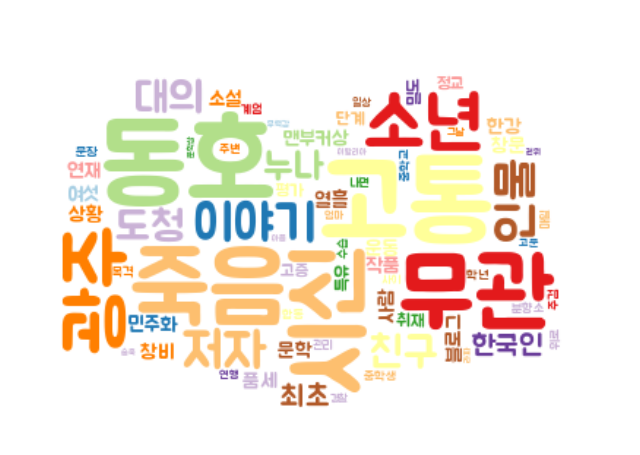

지구 끝의 온실 :김초엽 장편소설


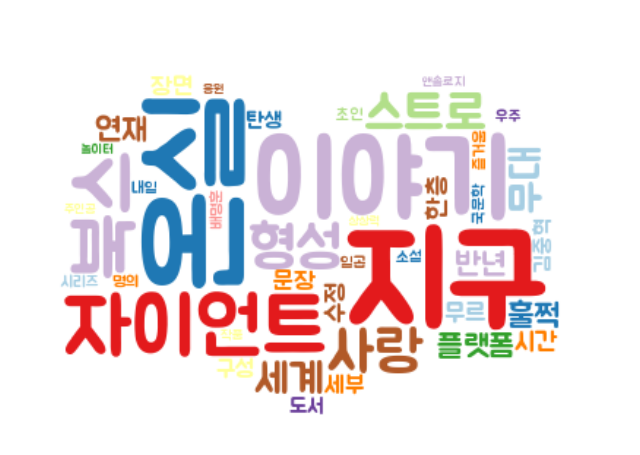

하얼빈 :김훈 장편소설


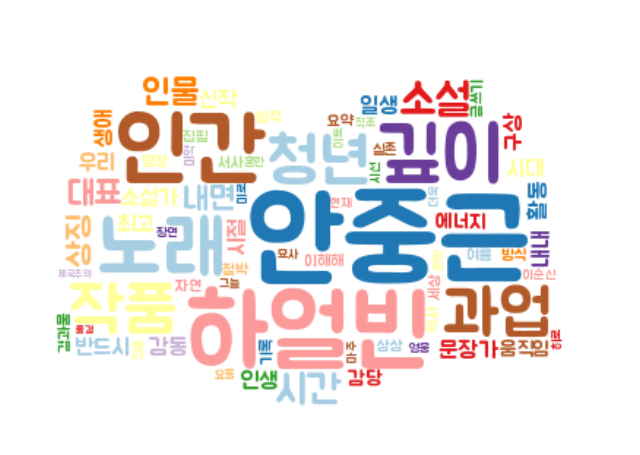

물고기는 존재하지 않는다 :상실, 사랑 그리고 숨어 있는 삶의 질서에 관한 이야기


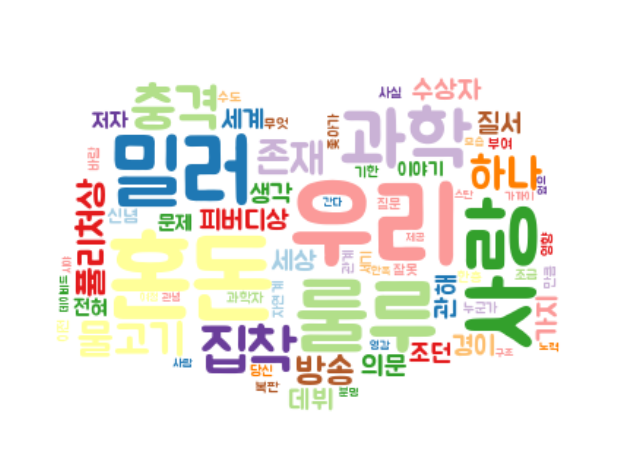

H마트에서 울다


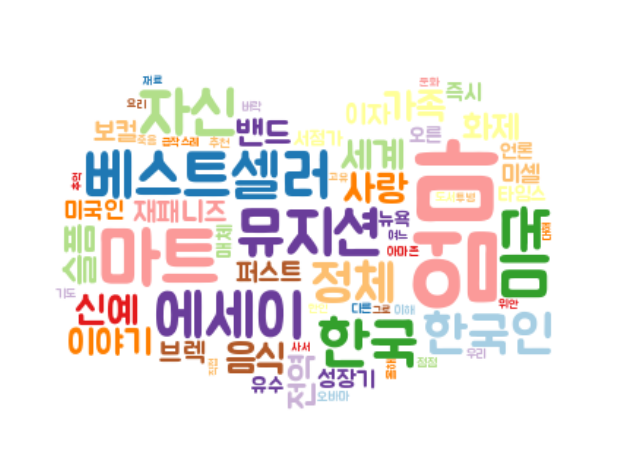

불편한 편의점 :김호연 장편소설 .2


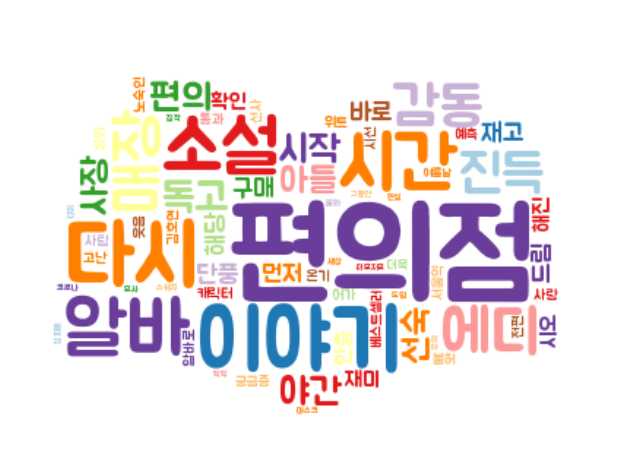

코스모스 :특별판


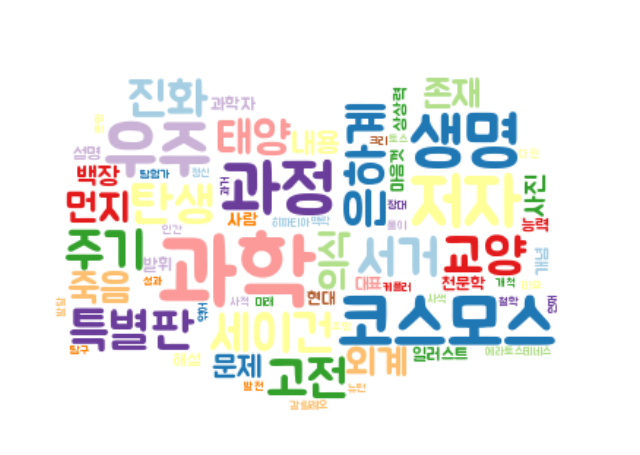

문과 남자의 과학 공부 :나는 무엇이고 왜 존재하며 어디로 가는가?


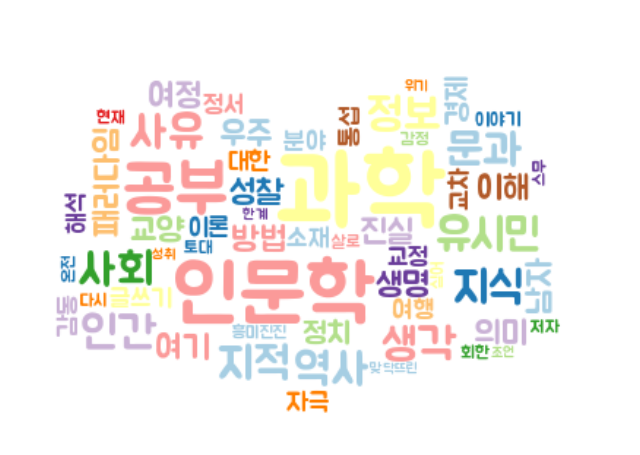

월급쟁이 부자로 은퇴하라 :3년 만에 30년 치 연봉을 번 김 과장의 시스템 마련법


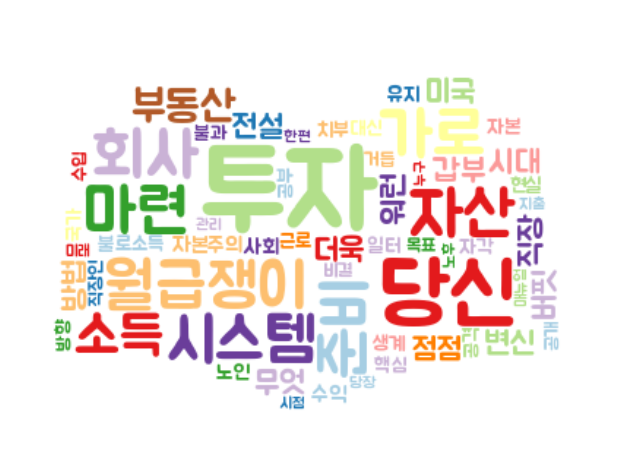

(나를 숨 쉬게 하는) 보통의 언어들


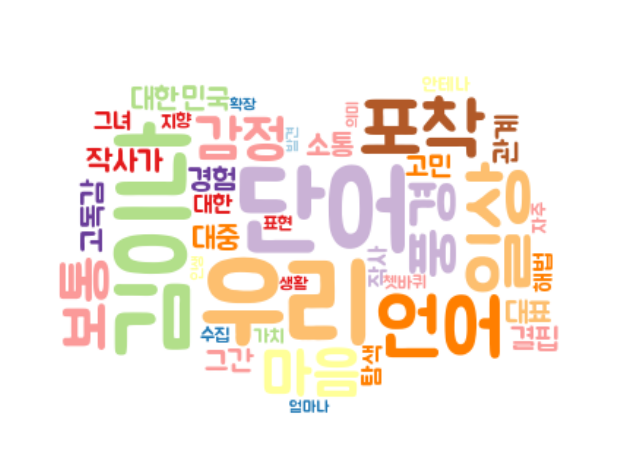

In [71]:
from wordcloud import WordCloud
from PIL import Image
import numpy as np

book_image_path = '/content/book_mask_image.png'

word_cloud = WordCloud(font_path,
                       background_color = 'white',
                       width=800,
                       height=600,
                       colormap='Paired',
                       mask=np.array(Image.open(book_image_path))
                       )

for key, value in word_dict.items():
  print(key)
  cloud = word_cloud.generate_from_frequencies(value)
  plt.figure(figsize=(8,8))
  plt.imshow(cloud, interpolation='bilinear')
  plt.axis('off')
  plt.show()
  cloud.to_file(key + '_cloud.jpg')